In [243]:
# Load imports 

from skimage import data
from skimage import color
from skimage.filters import meijering, sato, frangi, hessian
import matplotlib.pyplot as plt
import ImageManipFuncs as IMF
import PlottingFuncs as PF
import ImageAnalysis as IA
import myGUI 
from scipy.ndimage import gaussian_filter
import importlib
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os
import ipywidgets as widgets
from IPython.display import display
import math
from PIL import Image, ImageDraw, ImageTk, ImageOps
import tkinter as tk
from tkinter import ttk
from astropy.io import fits
from skimage.morphology import skeletonize
from skimage import io
import csv
import Metric

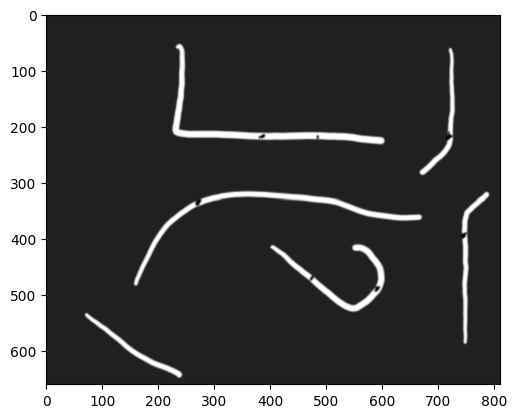

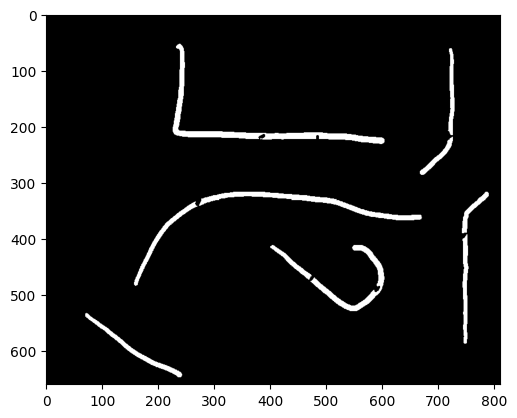

In [283]:
#FITS file
fits_file = r"C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\galaxysim_SigmaHI_scaledecomposed_intensitytransformed\galaxysim_SigmaHI_CDDss0016pc_arcsinh0p1.fits"

# Load the FITS file data
hdul = fits.open(fits_file)
image_data = np.array(hdul[0].data)  

test_image_path = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\myTest.png'
image_data = cv2.imread(test_image_path, cv2.IMREAD_COLOR)

# Convert to grayscale
image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)  

plt.imshow(image_data, cmap = 'gray')
plt.show()

thresh = cv2.adaptiveThreshold(image_data, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, -40)

plt.imshow(thresh, cmap = 'gray')
plt.show()


In [253]:
# Save as FITS
skel_image_file_fits = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\longestPath2.fits'
hdu = fits.PrimaryHDU(skel)
hdul = fits.HDUList([hdu])
hdul.writeto(skel_image_file_fits, overwrite=True)

c:\Users\HP\Documents\JHU_Academics\Research\PHANGS\PHANGSDustFill\PlottingFuncs.py:99: RuntimeWarning: divide by zero encountered in divide
  angle_map = -1 * np.degrees(np.arctan(Gy / Gx))
c:\Users\HP\Documents\JHU_Academics\Research\PHANGS\PHANGSDustFill\PlottingFuncs.py:99: RuntimeWarning: invalid value encountered in divide
  angle_map = -1 * np.degrees(np.arctan(Gy / Gx))
c:\Users\HP\Documents\JHU_Academics\Research\PHANGS\PHANGSDustFill\PlottingFuncs.py:84: RuntimeWarning: invalid value encountered in scalar divide
  return np.degrees(np.arctan(sin_sum/cos_sum))


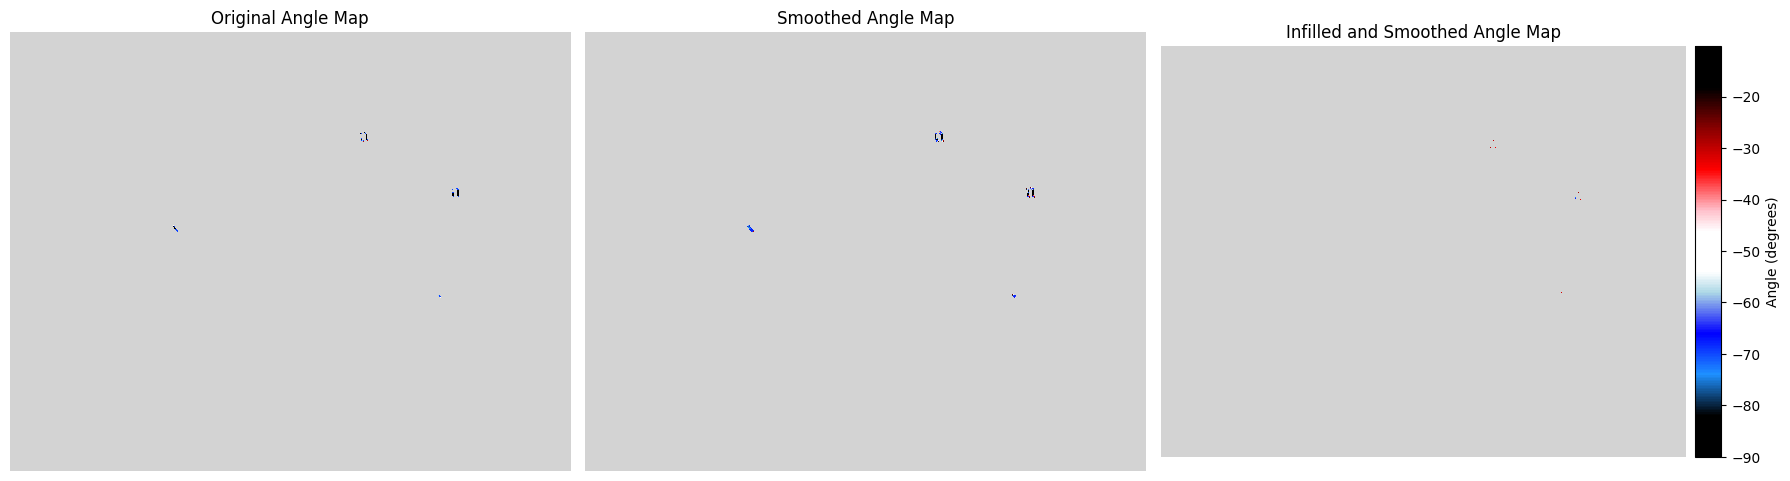

Smoothed angle map saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\smoothed_angles.png


In [254]:
importlib.reload(PF)
smoothed_angles = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\smoothed_angles.png'

smoother_angle_map, smoothed_angled_map = PF.plot_arctan_with_smoothing(Gy_total, Gx_total, skel, 3, smoothed_angles)

In [255]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import csv
import importlib

# Reload your GUI module if necessary
importlib.reload(myGUI)
importlib.reload(Metric)
import pandas as pd 
import RHT 
import math 
import CircularEMDTest as CT
importlib.reload(CT)
importlib.reload(IA)
importlib.reload(CT)
importlib.reload(RHT)
# Paths and image loading
angle_image_path = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\smoothed_angles.png'
angle_img = cv2.imread(angle_image_path, cv2.COLOR_BGR2RGB)

hex_sizes = [60]

for hexagon_size in hex_sizes: 
    # Hexagon settings
    hexagons, hexagon_image_og = myGUI.display_image_with_hexagons(angle_image_path, hexagon_size)
    hexagon_centers = [x[0] for x in hexagons]
    hexagon_corners = [x[1] for x in hexagons]
    hex_dict = {}

    # Path to the original image
    # Load the original image in grayscale mode
    original_img = data


    for i in range(len(hexagon_corners)):
        
        EMD_sum = 0
        alignment_sum = 0
        hist_metric_sum = 0
        RHT_sum = 0
        for j in range(3):
            if j == 0:
                shift_x = 0
                shift_y = 0
            elif j ==1: 
                shift_x = -(hexagon_corners[i][5][0] - hexagon_centers[i][0])
                shift_y = -(hexagon_corners[i][5][1] - hexagon_centers[i][1])
            elif j == 2:
                shift_x = -(hexagon_corners[i][2][0] - hexagon_centers[i][0])
                shift_y = -(hexagon_corners[i][2][1] - hexagon_centers[i][1])
            # Apply shift to all corners for the current `j`
            shifted_corners = [(x + shift_x, y + shift_y) for (x, y) in hexagon_corners[i]]

            mask = myGUI.get_hexagon_mask(image_data.shape, shifted_corners)

            data_in_hexagon = smoother_angle_map[mask == 255]
            data_in_hexagon = [x for x in data_in_hexagon if not np.isnan(x)]
            # Assuming skel, mask, smoother_angle_map, image_data, and IA.identify_connected_components are defined

            # Convert skel to uint8 for compatibility with cv2 functions
            skel = skel.astype(np.uint8)

            # Apply the binary mask to skel. Where mask == 255, skel values are preserved; otherwise, set to 0.
            masked_skel = np.where(mask == 255, skel, 0).astype(np.uint8)
            # Create a figure and two subplots (side by side)

            labels, stats, num_labels = IA.identify_connected_components(masked_skel.astype(np.uint8))
            if (num_labels-1) != 0 and len(data_in_hexagon) > 30:
                # fig, ax = plt.subplots(1, 3, figsize=(12, 6))  # Adjust figsize as needed

                # # Display masked_skel in the first subplot
                # ax[0].imshow(masked_skel, cmap='gray')
                # ax[0].set_title('Masked Skeleton')
                # ax[0].axis('off')  # Hide the axis
                # # Display mask in the second subplot
                # ax[2].imshow(mask, cmap='gray')
                # ax[2].set_title('Mask')
                # ax[2].axis('off')  # Hide the axis
                # # Display mask in the second subplot
                # ax[1].imshow(skel, cmap='gray')
                # ax[1].set_title('Mask')
                # ax[1].axis('off')  # Hide the axis

                # # Show the plot
                # plt.tight_layout()  # Adjust layout to prevent overlap
                # plt.show()
                # # Identify connected components in the masked skeleton image
                # print(num_labels-1)
            # Dictionary to hold segment data
                segment_dict = {}
                RHT_dict = {}
                for segment in range(1, num_labels):
                    # Extract the bounding box coordinates for the segment
                    x, y, w, h, _ = stats[segment]

                    # Create a mask for the segment
                    seg_mask = np.zeros_like(skel, dtype=np.uint8)
                    seg_mask[y:y+h, x:x+w] = 255

                    # Apply the segment mask to the skeleton image
                    # Ensure both masks are of type uint8
                    segment_mask = cv2.bitwise_and(skel, seg_mask)
                    theta, R, quantiles = RHT.rht(255*segment_mask, radius=10, ntheta=180, background_percentile=25, verbose=False)
                    orientation = quantiles[1]*-180/math.pi
                    # Collect pixel values for the segment
                    # Ensure segment_mask is boolean for indexing
                    segment_mask_bool = segment_mask > 0
                    segment_data = smoother_angle_map[segment_mask_bool]
                    segment_data = [x for x in segment_data if not np.isnan(x)]

                    # Skip the segment if segment_data is empty
                    if len(segment_data) < 10:
                        continue
                    # plt.imshow(segment_mask, cmap = 'gray')
                    # plt.show()
                    # print(f'Orientation: {orientation}')
                    # Ensure segment_mask is used properly for indexing
                    intensity = np.sum(segment_mask_bool)

                    # Store segment data in the dictionary
                    segment_dict[segment] = (segment_data, intensity)
                    pixels = smoother_angle_map[segment_mask_bool]
                    RHT_dict[segment] = (orientation, intensity, pixels)
                if len(segment_dict.keys()) >= 2:
                    EMD_sum += CT.compute_my_metric(segment_dict)
                    RHT_sum +=RHT.RHTMetric(RHT_dict)
                    # print(RHT_sum)
                    # print(RHT_dict)
                else:
                    EMD_sum += np.nan
                    RHT_sum += np.nan
                alignment_sum  += Metric.alignment_metric(data_in_hexagon)
                hist_metric_sum += Metric.compute_my_metric(data_in_hexagon)

            else:

                EMD_sum += np.nan
                alignment_sum   += np.nan
                hist_metric_sum  += np.nan
                RHT_sum += np.nan

        hex_dict[hexagon_centers[i]] = (EMD_sum/3, len(data_in_hexagon), num_labels-1, alignment_sum/3,hist_metric_sum/3, shifted_corners, RHT_sum/3)

    print(f'Number of hexagons: {len(hexagon_centers)}')

    # Create a new image to draw the hexagons filled with the alignment metric colors
    hexagon_image1 = Image.new("RGB", (img.shape[1], img.shape[0]))
    hexagon_image2 = Image.new("RGB", (img.shape[1], img.shape[0]))
    hexagon_image3 = Image.new("RGB", (img.shape[1], img.shape[0]))
    hexagon_image4 = Image.new("RGB", (img.shape[1], img.shape[0]))

    draw1 = ImageDraw.Draw(hexagon_image1)
    draw2 = ImageDraw.Draw(hexagon_image2)
    draw3 = ImageDraw.Draw(hexagon_image3)
    draw4 = ImageDraw.Draw(hexagon_image4)

    count = 0

    # Save hex_dict to CSV
    csv_path = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\PHANGSDustFill\thresholded_image.csv'
    with open(csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Hexagon Center', 'Number of Pixels', 'num_segments','EMD relative Metric', 'my hist metric', 'my hist metric sq', 'circ stat metric'])

        # Extract the first elements from each tuple
        EMD_metrics = [info[0] for info in hex_dict.values() if not np.isnan(info[0])]
        hist_metrics = [info[4] for info in hex_dict.values() if not np.isnan(info[4])]

        # Calculate the max and min values of the first elements
        EMD_max_metric = max(EMD_metrics)
        EMD_min_metric = min(EMD_metrics)
        hist_max_metric = max(hist_metrics)
        hist_min_metric = min(hist_metrics)
        print(EMD_max_metric, EMD_min_metric)
        for center, info in hex_dict.items():
            EMD_metric = info[0]
            circ_stat_metric = info[3]
            hist_metric = info[4]
            number_of_pixels = info[1]
            segments = info[2]

            EMD_relative_metric = (EMD_metric - EMD_min_metric) / (EMD_max_metric - EMD_min_metric)
            hist_relative_metric = (hist_metric - hist_min_metric) / (hist_max_metric - hist_min_metric)

            # Check if segments is an empty list or contains NaN
            if not segments or isinstance(segments, float) and np.isnan(segments):
                num_seg = 0
            else:
                num_seg = segments

            writer.writerow([center, number_of_pixels, 1 - EMD_relative_metric, hist_metric, hist_metric**2, circ_stat_metric, num_seg])
            if not np.isnan(hist_metric):
                grayscale_value2 = int(255*hist_metric)
                grayscale_value3 = int(255*(hist_metric**2))  # Map to grayscale (0 to 255)
                grayscale_value4 = int(255*circ_stat_metric)
                corners = hexagon_corners[count]
                draw2.polygon(corners, fill=(grayscale_value2, grayscale_value2, grayscale_value2), outline="purple")
                draw3.polygon(corners, fill=(grayscale_value3, grayscale_value3, grayscale_value3), outline="purple")
                draw4.polygon(corners, fill=(grayscale_value4, grayscale_value4, grayscale_value4), outline="purple")
            else:
                corners = hexagon_corners[count]
                draw2.polygon(corners, fill=(0, 0, 0), outline="purple")
                draw3.polygon(corners, fill=(0, 0, 0), outline="purple")
                draw4.polygon(corners, fill=(0, 0, 0), outline="purple")
            if not np.isnan(EMD_relative_metric):
                grayscale_value1 = int(255 - EMD_relative_metric * 255)  # Map to grayscale (0 to 255)
                draw1.polygon(corners, fill=(grayscale_value1, grayscale_value1, grayscale_value1), outline="purple")
            else:
                corners = hexagon_corners[count]
                draw1.polygon(corners, fill=(0, 0, 0), outline="purple")
            count += 1

    # Convert PIL images to numpy arrays
    hexagon_image1_array = np.array(hexagon_image1.convert('L'))
    hexagon_image2_array = np.array(hexagon_image2.convert('L'))
    hexagon_image3_array = np.array(hexagon_image3.convert('L'))
    hexagon_image4_array = np.array(hexagon_image4.convert('L'))

    # Display the original and processed images with grayscale colormap
    fig, ax = plt.subplots(1, 5, figsize=(18, 18))  # Adjust the figsize as needed

    ax[0].imshow(np.flipud(hexagon_image_og))
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].imshow(np.flipud(hexagon_image1_array), cmap='gray')
    ax[1].set_title('EMD_relative_Metric')
    ax[1].axis('off')

    ax[2].imshow(np.flipud(hexagon_image2_array), cmap='gray')
    ax[2].set_title('bin_metric')
    ax[2].axis('off')

    ax[3].imshow(np.flipud(hexagon_image3_array), cmap='gray')
    ax[3].set_title('bin_metric_squared')
    ax[3].axis('off')

    ax[4].imshow(np.flipud(hexagon_image4_array), cmap='gray')
    ax[4].set_title('circ_stat_metric')
    ax[4].axis('off')

    # Define your hexagon images as numpy arrays
    hexagon_images = {
        'EMD_relative_Metric': hexagon_image1_array,
        'bin_metric': hexagon_image2_array,
        'bin_metric_squared': hexagon_image3_array,
        'circ_stat_metric': hexagon_image4_array
    }

    plt.show()


nan
nan
Number of hexagons: 210


ValueError: max() iterable argument is empty

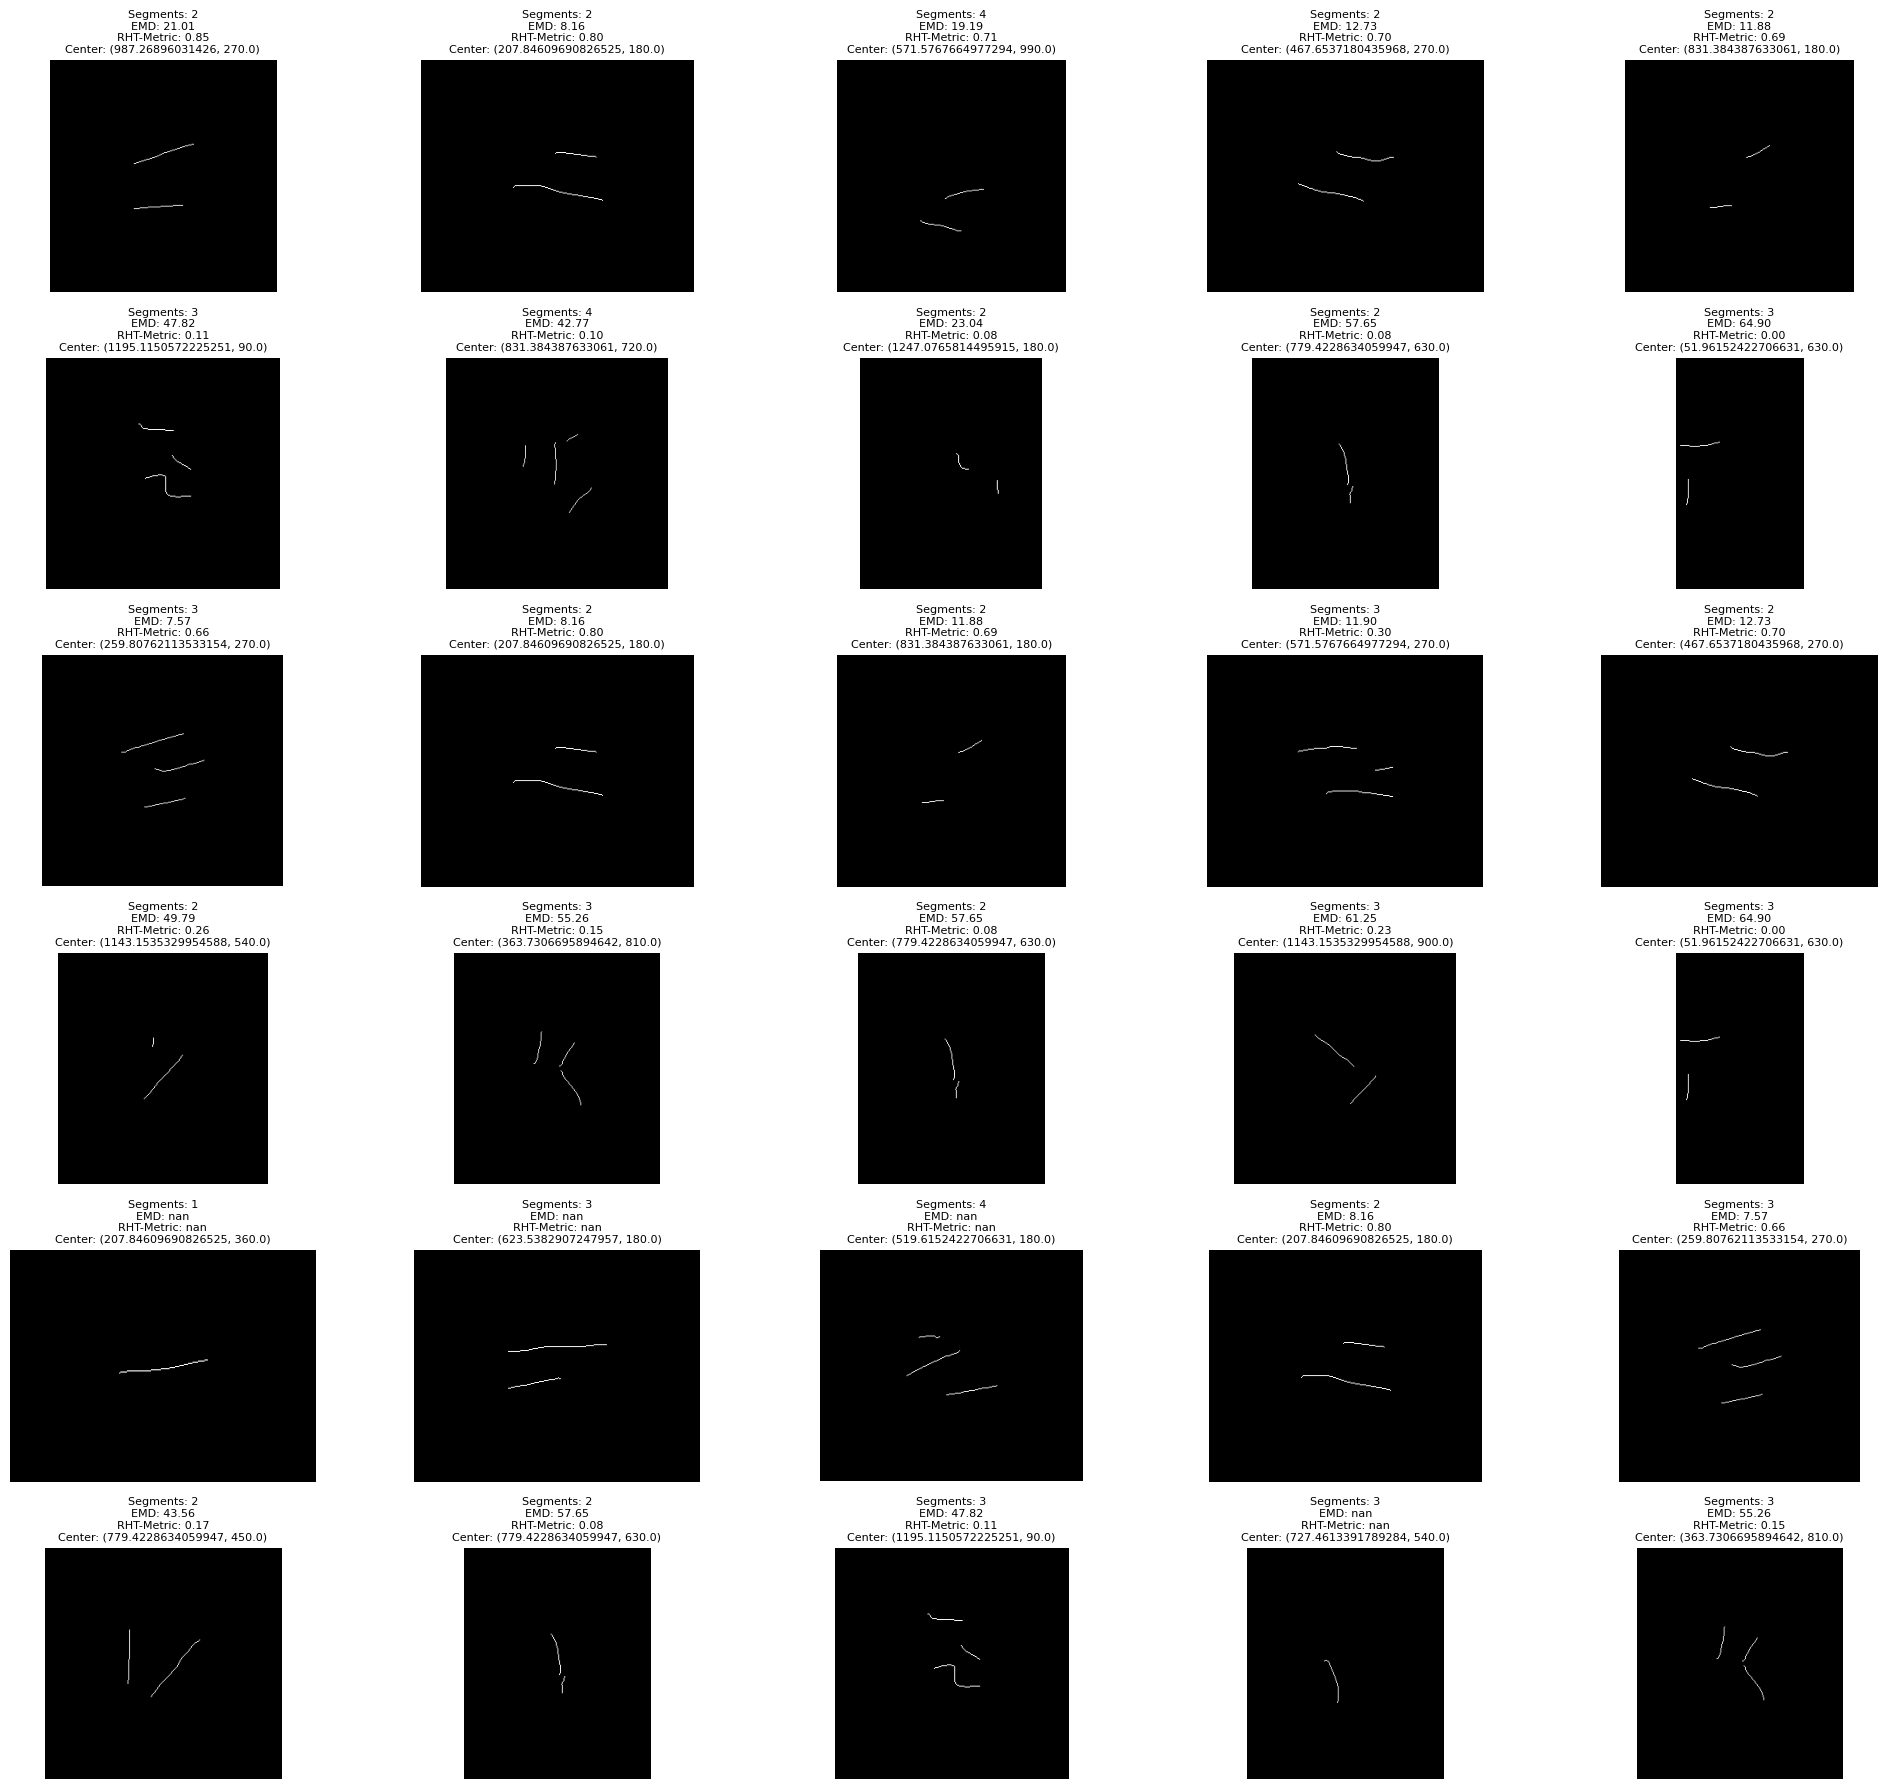

In [340]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from astropy.io import fits

fits_file = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\longestPath2.fits'

# Load the FITS file data
hdul = fits.open(fits_file)
skel = np.array(hdul[0].data)  # Assuming the image data is in the primary HDU

# Function to create a mask for a specific hexagon centered at `center`
def create_hexagon_mask(image_shape, center, corners):
    mask = myGUI.get_hexagon_mask(image_shape, corners)
    return mask

# Function to extract and zoom in on a specific hexagon region from the skel image
def extract_and_zoom_hexagon_region(skel_img, center, corners, zoom_factor=2):
    mask = create_hexagon_mask(skel_img.shape, center, corners)
    # Apply the binary mask to skel. Where mask == 255, skel values are preserved; otherwise, set to 0.
    masked_skel = np.where(mask == 255, skel, 0).astype(np.uint8)
    
    # Find bounding box of the hexagon
    y_indices, x_indices = np.where(masked_skel)
    if len(x_indices) == 0 or len(y_indices) == 0:
        return np.zeros((256, 256), dtype=np.uint8)  # Return a blank image if no region found
    
    min_x, max_x = min(x_indices), max(x_indices)
    min_y, max_y = min(y_indices), max(y_indices)
    
    # Calculate initial crop boundaries
    crop_min_y = min_y - 100
    crop_max_y = max_y + 100
    crop_min_x = min_x - 100
    crop_max_x = max_x + 100

    # Ensure boundaries are within the image dimensions
    crop_min_y = max(crop_min_y, 0)
    crop_max_y = min(crop_max_y, skel_img.shape[0])
    crop_min_x = max(crop_min_x, 0)
    crop_max_x = min(crop_max_x, skel_img.shape[1])

    # Crop the image with adjusted boundaries
    region_cropped = masked_skel[crop_min_y:crop_max_y, crop_min_x:crop_max_x]
    labels, stats, num_labels = IA.identify_connected_components(region_cropped.astype(np.uint8))
    to_see = np.zeros_like(region_cropped)
    for segment in range(1,num_labels):
        x, y, w, h, _ = stats[segment]
        if np.sum(region_cropped[y:y+h, x:x+w])>10*255:
            to_see[y:y+h, x:x+w]+=region_cropped[y:y+h, x:x+w]
        else:
            continue

    return to_see
    return region_cropped

# Helper function to filter out items with NaN values in specific metric indices
def filter_nan_items(hex_dict, metric_index):
    return {k: v for k, v in hex_dict.items() if not np.isnan(v[metric_index])}

index = 6
# Filter hex_dict to remove items with NaN values in the metrics used for sorting
filtered_hex_dict_bin = filter_nan_items(hex_dict, index)
filtered_hex_dict_EMD = filter_nan_items(hex_dict, 0)
filtered_hex_dict_hist_bin = filter_nan_items(hex_dict, 4)

# Sort the hexagons based on metrics
sorted_by_bin_metric = sorted(filtered_hex_dict_bin.items(), key=lambda x: x[1][index], reverse=True)
sorted_by_EMD_metric = sorted(filtered_hex_dict_EMD.items(), key=lambda x: x[1][0])
sorted_by_hist_bin_metric = sorted(filtered_hex_dict_hist_bin.items(), key=lambda x: x[1][4], reverse=True)

# Extract the top 5 and bottom 5 for each metric
n = 5
top_bin_metric = sorted_by_bin_metric[:n]
bottom_bin_metric = sorted_by_bin_metric[-n:]
top_EMD_metric = sorted_by_EMD_metric[:n]
bottom_EMD_metric = sorted_by_EMD_metric[-n:]
top_hist_bin_metric = sorted_by_hist_bin_metric[:n]
bottom_hist_bin_metric = sorted_by_hist_bin_metric[-n:]

# Extract and zoom in on hexagon regions for each metric
def extract_and_zoom_regions(hex_list):
    zoomed_images = []
    titles = []
    for center, info in hex_list:
        corners = info[5]
        zoomed_image = extract_and_zoom_hexagon_region(skel, center, corners)
        
        # Extract metrics and number of segments
        EMD_metric = info[0]
        num_segments = info[2]
        hist_metric = info[6]
        
        # Format title with metrics
        title = (f"Segments: {num_segments}\n"
                 f"EMD: {EMD_metric:.2f}\n"
                 f"RHT-Metric: {hist_metric:.2f}\n"
                 f"Center: {center}")
        
        zoomed_images.append(zoomed_image)
        titles.append(title)
    
    return zoomed_images, titles

# Get zoomed-in images and titles for the top and bottom hexagons
zoomed_top_bin, titles_top_bin = extract_and_zoom_regions(top_bin_metric)
zoomed_bottom_bin, titles_bottom_bin = extract_and_zoom_regions(bottom_bin_metric)
zoomed_top_EMD, titles_top_EMD = extract_and_zoom_regions(top_EMD_metric)
zoomed_bottom_EMD, titles_bottom_EMD = extract_and_zoom_regions(bottom_EMD_metric)
zoomed_top_hist_bin, titles_top_hist_bin = extract_and_zoom_regions(top_hist_bin_metric)
zoomed_bottom_hist_bin, titles_bottom_hist_bin = extract_and_zoom_regions(bottom_hist_bin_metric)

# Display the zoomed-in hexagon regions
fig, ax = plt.subplots(6, 5, figsize=(20, 18))  # Update the grid to 6x5

# Function to display images with titles
def display_zoomed_images(ax, images, titles):
    for i, (image, title) in enumerate(zip(images, titles)):
        if i < len(ax.flat):
            ax.flat[i].imshow(image, cmap='gray')
            ax.flat[i].set_title(title, fontsize=8)
            ax.flat[i].axis('off')

# Plot images in the 6x5 grid
def plot_images(ax, images, titles, start_idx):
    for i, (image, title) in enumerate(zip(images, titles)):
        if i + start_idx < len(ax.flat):
            ax.flat[i + start_idx].imshow(image, cmap='gray')
            ax.flat[i + start_idx].set_title(title, fontsize=8)
            ax.flat[i + start_idx].axis('off')

plot_images(ax, zoomed_top_bin, titles_top_bin, 0)
plot_images(ax, zoomed_bottom_bin, titles_bottom_bin, 5)
plot_images(ax, zoomed_top_EMD, titles_top_EMD, 10)
plot_images(ax, zoomed_bottom_EMD, titles_bottom_EMD, 15)
plot_images(ax, zoomed_top_hist_bin, titles_top_hist_bin, 20)
plot_images(ax, zoomed_bottom_hist_bin, titles_bottom_hist_bin, 25)

plt.tight_layout()
plt.show()
